# This notebook show how to do 
## 1 PCA
- PCA on MNIST handwritten dataset.
- Introduce some noise
- How to project data into new basis(principle components)
- Reconstruct data using only few principle components(Leave principle component capturing less variation in data). If noise is in later principle compnent direction then we have effectively denosied the images.

## 2  Fisher LDA
 
We will load mnist data set and after loading the data set intentionally put some random noise at each pixel. As we will see later we can still recognise the digit. It means signal is still dominant and noise is not among the major direction(principle component) of variation in the digits. Hence if we remove later principle compoenent we can denoise the digits.

Please follow lecture note to understand operations in this notebook

In [1]:
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler


In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

/home/pooran/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(60000, 28, 28)


**train Data is of shape (60000, 28, 28). It contains 60000 digits of shape 28X28. **
Data is loaded in **numpy  array object. It provides powerful multi dimensional array abstraction. 2d array provides matrix abstraction**. Checkout [numpy](http://www.numpy.org/) for quick numpy review.


In [4]:
matplotlib.rcParams['figure.figsize'] = (1, 1)

Let's work only 10000 data points to avoid memory issue.

In [5]:
X = x_train[0:10000,:]
Y = y_train[0:10000]
n_samples = X.shape[0]
print(n_samples)

10000


Generally if your features are measured in different units(cm. km, light year etc) then standardizing them is a good practice.
Otherwise features measured in bigger units will dominate the variance.
Also search when to standardise the feature for more detal explanation.

**In this example we are not using StandardScaler. Each feature value is pixel intensity. Hence unit is not an issue here. I just kept it here to make you aware of it. It is not the only way to standardize the data. To learn more read the sklearn documentation on standardizing data**

In [6]:
#std_scale = StandardScaler().fit(X)
#X = std_scale.transform(X)

# Let's plot some digits

# Let set the seed so than we can reproduce the results across multiple run of notebook

In [7]:
np.random.seed(1)

**Let's plot some random digits from the dataset by creating some random indexes**

In [8]:
samples_to_plot = 10
indexes = np.random.randint(0, high=n_samples, size= [samples_to_plot])

In [9]:
print(indexes)

[ 235 5192  905 7813 2895 5056  144 4225 7751 3462]


See below how to plot images using plt.imshow. we need to reshape the data to 8x8 shape for visualization purpose.

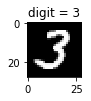

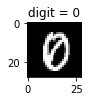

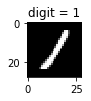

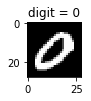

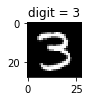

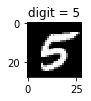

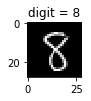

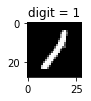

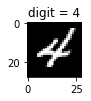

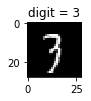

In [10]:
for idx in indexes:
    plt.imshow(X[idx,:],cmap= 'gray' )
    plt.title('digit = {}'.format(str(Y[idx])))
    plt.show()

**Adding some noise** Gaussian 

In [11]:
np.max(X)
X.shape

(10000, 28, 28)

In [12]:
X_noisy = X + 60*np.random.randn(*X.shape)

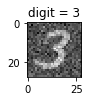

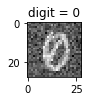

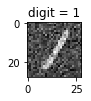

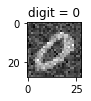

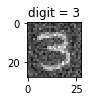

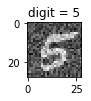

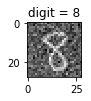

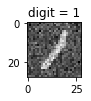

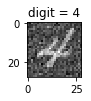

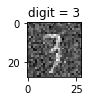

In [13]:
for idx in indexes:
    plt.imshow(X_noisy[idx,:],cmap= 'gray' )
    plt.title('digit = {}'.format(str(Y[idx])))
    plt.show()
    

# We can stil lreconize the digits. so noise is not the primary direction of variation
# Let's do PCA to get rid of noise, assuming noise is not the primary direction  of variance and lies on lowest principle component direction

Let's first centralize the data

# vectorizing data

In [14]:
X_noisy= X_noisy.reshape((X.shape[0], -1))
X_noisy.shape

(10000, 784)

In [15]:
#std_scale = StandardScaler().fit(X_noisy)
#X_noisy = std_scale.transform(X_noisy)

In [16]:
mu= np.mean(X_noisy, axis=0)

In [17]:
X_c = X_noisy - np.mean(X_noisy, axis=0)
print(X_c.shape)


(10000, 784)


In [18]:
np.mean(X_noisy, axis=0).shape

(784,)

AS per our discussion in the class we will use svd for doing PCA.

You can read about svd in detail [here](http://www.cs.cornell.edu/courses/cs3220/2010sp/notes/svd.pdf) or read your linear algerba book for SVD.

In [19]:
# U, E, VT = svd(X)
U, E, VT = np.linalg.svd(X_c, full_matrices=False)

In [20]:
U.shape, E.shape,VT.shape

((10000, 784), (784,), (784, 784))

# Let check if svd does matrix factorization or not

In [21]:

X_c_recn = np.dot(U, np.diag(E))
X_c_recn.shape

(10000, 784)

In [22]:
X_c_recn = np.dot(X_c_recn, VT)
X_c_recn.shape

(10000, 784)

In [23]:
E[:20]

array([59539.05187543, 50143.78625813, 46252.93353023, 43462.50366939,
       40948.94064247, 39379.67771036, 34134.98694636, 32305.39035989,
       31485.17203819, 28813.82744844, 27707.4861639 , 27206.3369527 ,
       24878.37474754, 24696.77837133, 24368.30970393, 23759.78500675,
       21886.03780249, 21720.92682674, 20886.95354226, 20617.89863793])

## Should get true on element wiser comparision

In [24]:
np.allclose(X_c, X_c_recn)

True

Hence column of V or row of VT are eigen vectors of $X_c^TX_c$

# Let's plot the variance explained

In [25]:
E_cumsum = np.cumsum(E)
print(E_cumsum)
total_variance = np.sum(E)


[  59539.05187543  109682.83813356  155935.77166379  199398.27533318
  240347.21597565  279726.89368601  313861.88063236  346167.27099226
  377652.44303045  406466.27047889  434173.75664279  461380.09359549
  486258.46834303  510955.24671435  535323.55641828  559083.34142503
  580969.37922751  602690.30605425  623577.25959651  644195.15823444
  664011.80058604  683592.26507717  702714.05024718  721610.64329899
  739874.33477558  758043.15611513  775794.2860545   793136.86220533
  810115.78067211  826693.99495214  842848.16717366  858819.58825371
  874430.49664509  889927.15533016  904991.14470511  919828.23919815
  934498.60517632  948726.8409022   962949.84113594  977136.37688666
  991126.92385553 1004661.55309552 1018040.20458858 1031365.6645165
 1044348.59679251 1057139.17757089 1069858.6764271  1082416.32720242
 1094810.05656978 1107114.76810249 1119355.62531209 1131540.95690418
 1143429.52439697 1155239.67079644 1166804.0901695  1178304.87777231
 1189622.94024445 1200900.3164869  

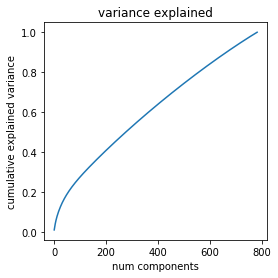

In [26]:
plt.figure(figsize=(4,4))
plt.plot(E_cumsum/E_cumsum[-1])
plt.title('variance explained')
plt.xlabel('num components')
plt.ylabel('cumulative explained variance')
plt.show()

In [27]:
index_per = int(len(E_cumsum)*.2)
print(index_per)

156


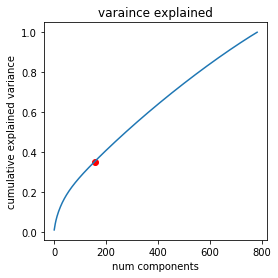

In [28]:
plt.figure(figsize=(4,4))

plt.plot(index_per, E_cumsum[index_per]/E_cumsum[-1], 'ro')
plt.plot(E_cumsum/E_cumsum[-1])
plt.title('varaince explained')
plt.xlabel('num components')
plt.ylabel('cumulative explained variance')
plt.show()

looks  like using 156 component is also fine.

Let's reconstruct

In [29]:
reduced_dim = index_per
print(reduced_dim)

156


In [30]:

X_proj= np.dot(X_c, VT.T[:, :reduced_dim])

In [31]:
print(X_proj.shape)

(10000, 156)


In [32]:
X_reconstructed = np.dot(X_proj,VT[:reduced_dim, :])

In [33]:
print(X_reconstructed.shape)

(10000, 784)


In [34]:
X_reconstructed += mu
X_reconstructed.shape

(10000, 784)

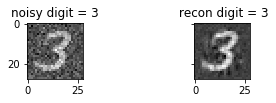

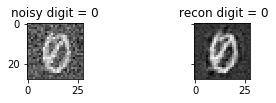

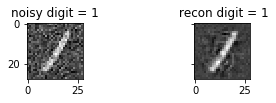

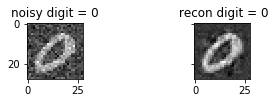

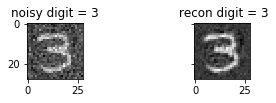

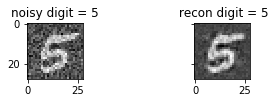

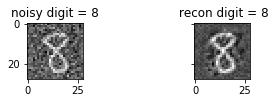

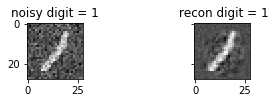

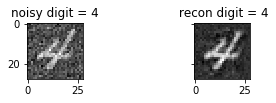

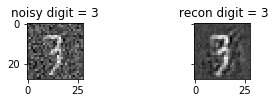

In [35]:
for idx in indexes:
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= (4,4))
    ax1.imshow(np.reshape(X_noisy[idx,:], (28,28)),cmap= 'gray' )
    ax1.set_title('noisy digit = {}'.format(str(Y[idx])))
    ax2.imshow(np.reshape(X_reconstructed[idx,:], (28,28)),cmap= 'gray' )
    ax2.set_title(' recon digit = {}'.format(str(Y[idx])))
    # Fine-tune figure; make subplots farther from each other.
    f.subplots_adjust(hspace=2.0, wspace = 2.0)
    
    plt.show()

# Let's visualize  first two component in project PCA space for all the data

In [36]:
Y.shape

(10000,)

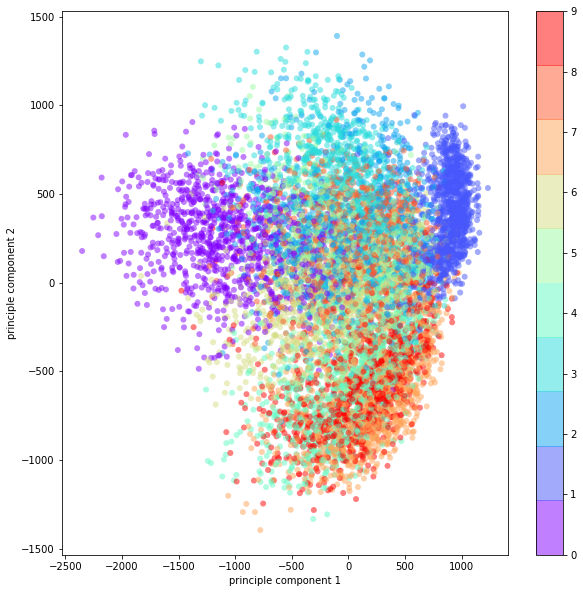

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(X_proj[:, 0], X_proj[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')
plt.colorbar();

# Let's use sklearn

In [38]:
from sklearn.decomposition import  PCA
from sklearn import preprocessing
#std_scale = preprocessing.StandardScaler().fit(X)
#X_train_std = std_scale.transform(X)
pca = PCA(n_components=reduced_dim, svd_solver='full')
pca.fit(X_noisy)

PCA(copy=True, iterated_power='auto', n_components=156, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [39]:
X_pca= pca.fit_transform(X_noisy)

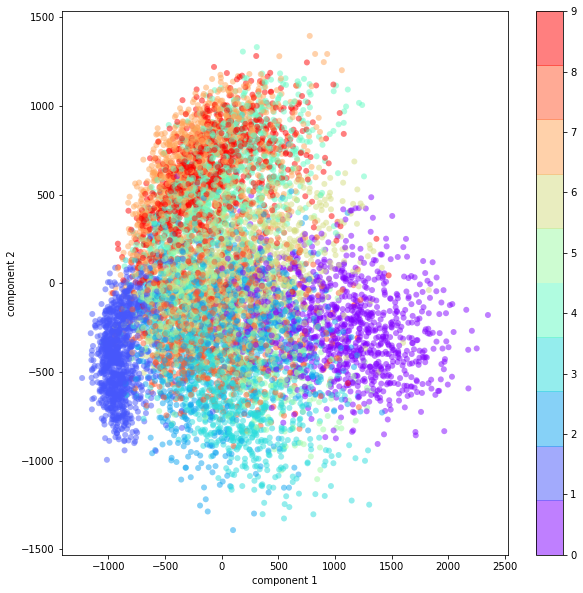

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


# Doing PCA using covariance matrix

# Q1 Build covariance matrix and do eigen vector and value computation for doing PCA.

I have given some hint below

In [41]:
X_co = np.dot(X_c.T, X_c)
print(X_co.shape)

(784, 784)


In [42]:
eig_val, eig_vec = np.linalg.eigh(X_co)

In [43]:
print(eig_val)


[2.05846752e+07 2.08386059e+07 2.09871843e+07 2.10566861e+07
 2.11231979e+07 2.12358603e+07 2.13639437e+07 2.14006215e+07
 2.15285499e+07 2.16125162e+07 2.16829255e+07 2.18666679e+07
 2.19280653e+07 2.19639635e+07 2.20180447e+07 2.21386009e+07
 2.21728545e+07 2.23020305e+07 2.23675543e+07 2.23804482e+07
 2.24529273e+07 2.25200660e+07 2.26340390e+07 2.26525289e+07
 2.27136030e+07 2.27340157e+07 2.27905268e+07 2.29255210e+07
 2.29836318e+07 2.30349245e+07 2.30994921e+07 2.31393707e+07
 2.31695893e+07 2.31865993e+07 2.32811576e+07 2.33648561e+07
 2.34975503e+07 2.35296962e+07 2.35806276e+07 2.36017515e+07
 2.36621430e+07 2.37051256e+07 2.37542890e+07 2.38377722e+07
 2.38577562e+07 2.39165567e+07 2.39925787e+07 2.40688309e+07
 2.41177712e+07 2.42500412e+07 2.43174616e+07 2.43378357e+07
 2.43959521e+07 2.44277447e+07 2.44641970e+07 2.45205275e+07
 2.45921827e+07 2.46769884e+07 2.46907744e+07 2.47237132e+07
 2.47798713e+07 2.47988708e+07 2.49041171e+07 2.49302062e+07
 2.49653432e+07 2.501690

See that eigenvalues are in ascending order

In [44]:
reduced_dim

156

In [45]:
V = eig_vec[:,::-1][:, :reduced_dim]
V.shape

(784, 156)

In [46]:

X_proj= np.dot(X_c, V)

In [47]:
X_reconstructed = np.dot(X_proj,V.T)

In [48]:
X_reconstructed += mu

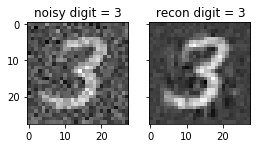

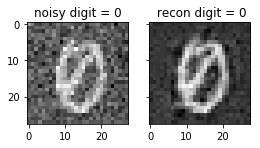

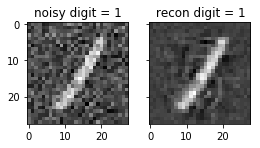

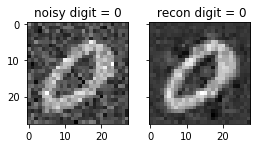

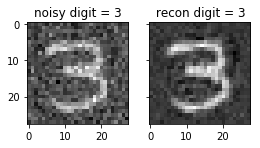

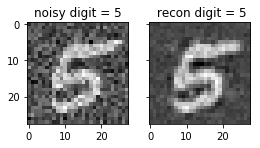

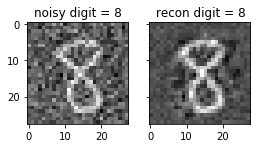

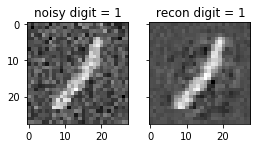

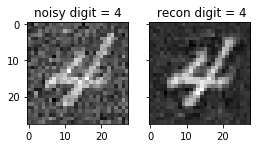

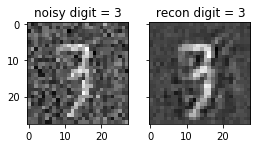

In [49]:
for idx in indexes:
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= (4,4))
    ax1.imshow(np.reshape(X_noisy[idx,:], (28,28)),cmap= 'gray' )
    ax1.set_title('noisy digit = {}'.format(str(Y[idx])))
    ax2.imshow(np.reshape(X_reconstructed[idx,:], (28,28)),cmap= 'gray' )
    ax2.set_title(' recon digit = {}'.format(str(Y[idx])))
    # Fine-tune figure; make subplots farther from each other.
    f.subplots_adjust(hspace=4.0)
    plt.show()

# Q2 Plot variance explained and first two components in the projected PCA space.

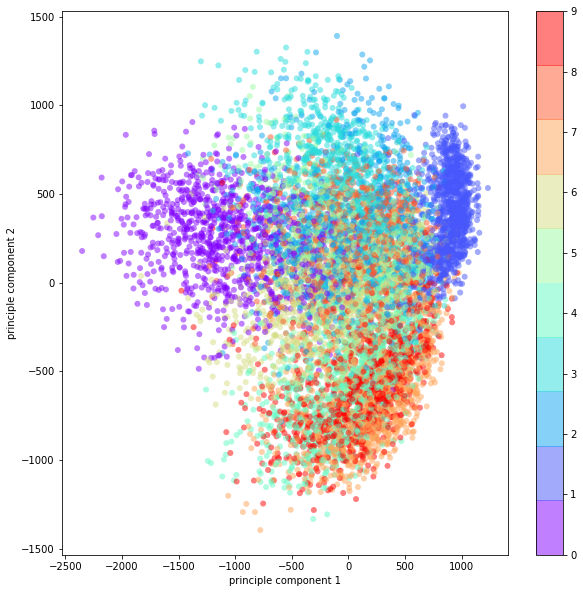

In [50]:
plt.figure(figsize=(10,10))
plt.scatter(X_proj[:, 0], X_proj[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')
plt.colorbar();

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# working with full dataset

In [52]:
X= x_train
Y= y_train

In [53]:
from skimage.transform import  resize

Resizing 28x28 image to 8x8

<font color = 'red'> follwing operation will take some time. Don't run this cell again and again <font>

In [54]:
new_img_size = (8,8)
X1 = np.zeros((X.shape[0],np.product(new_img_size) ))
for i in range(X.shape[0]):
    x = resize(X[i], new_img_size)
    X1[i,:] = x.reshape((-1))

/home/pooran/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


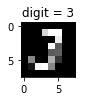

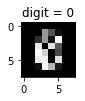

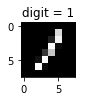

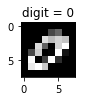

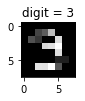

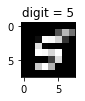

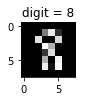

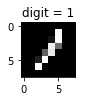

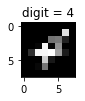

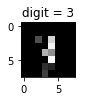

In [55]:
for idx in indexes:
    plt.imshow(np.reshape(X1[idx,:], new_img_size),cmap= 'gray' )
    plt.title('digit = {}'.format(str(Y[idx])))
    plt.show()

In [56]:
X = X1

In [57]:
lda = LDA(solver = 'eigen')
lda_fit = lda.fit(X, Y)


/home/pooran/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [58]:
X_lda = lda_fit.transform(X)

In [59]:
X_lda.shape

(60000, 9)

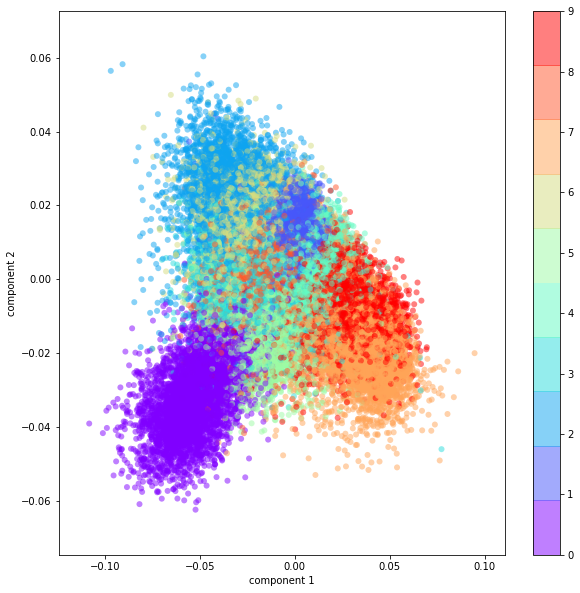

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(X_lda[:, 0], X_lda[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [61]:
unique_class_label = np.unique(Y)

In [62]:
print(unique_class_label)
num_classes = len(unique_class_label)


[0 1 2 3 4 5 6 7 8 9]


# Multiclass LDA see section 8.6.3.2 in the book

Let say we have $C$ classes

- $n_k=$ number of sample in class k
- $n = \sum_{k=1}^C n_k$ total sample

class $k$ mean $\mu_k= \frac{\sum_{i:y_i= k}x_i}{n_i}$ and over all mean $\mu= \frac{\sum_{i} x_i}{n}$

Objective function is $$\frac{|V^T S_B V|}{|V^TS_W V|}$$

where

- Within class scatter matrix  $S_w = \sum_{k=1}^C S_k$ and $S_k=  \sum_{i:y_i=k}((x_i - \mu_i)(x_i -\mu_i)^T)$
i.e class k unscaled covariance

- Between class scatter matrix $Sb =  \sum_{k=i}^{k=C} n_k (\mu_i - \mu)(\mu_i -\mu)^T$

Note maximum rank of $Sb$ is $C-1$


# computation of Sb and S_w

In [63]:
#std_scale = StandardScaler().fit(X1)
#X1 = std_scale.transform(X1)
#X = X1
feature_dim = X.shape[1]
S_w = np.zeros((feature_dim, feature_dim))# Total withi class scatter
S_b = np.zeros((feature_dim, feature_dim))# Between calss scatter
m = np.mean(X, axis=0) # over all mean
for cls_idx in unique_class_label:
    X_i = X[Y==cls_idx]
    m_i= np.mean(X_i,axis = 0)
    print('{} example  if class {}'.format(X_i.shape[0], cls_idx))
    S_b = S_b + X_i.shape[0]*np.outer(m_i- m, m_i -m)
    S_i = np.zeros((feature_dim, feature_dim))
    for sample in X_i:
        S_i = S_i + np.outer(sample -m_i, sample-m_i)
    assert S_i.shape == (feature_dim, feature_dim), "within class scatter size class {} not right".format(cls_idx)
    # Add to the over all withi class scatter S_w
    S_w = S_w + S_i
    

5923 example  if class 0
6742 example  if class 1
5958 example  if class 2
6131 example  if class 3
5842 example  if class 4
5421 example  if class 5
5918 example  if class 6
6265 example  if class 7
5851 example  if class 8
5949 example  if class 9


In [64]:
print(S_w.shape)
print(S_b.shape)

(64, 64)
(64, 64)


In [65]:
np.all(np.linalg.eigvals(S_w)>0)

True

Let's solve $S_b v = \lambda S_w v$ Generalized eigen value, vector

In [66]:
from scipy import  linalg

In [67]:
eig_val, eig_vec = linalg.eigh(S_b, S_w)

In [68]:
eig_val

array([-9.47465766e-16, -7.95323078e-16, -7.46250605e-16, -7.08863859e-16,
       -5.66218833e-16, -3.73220136e-16, -3.47932853e-16, -3.28856717e-16,
       -2.48283869e-16, -2.43556299e-16, -2.25864659e-16, -1.96797727e-16,
       -1.66802281e-16, -1.14829837e-16, -1.03568397e-16, -8.90817543e-17,
       -8.59538479e-17, -5.31255888e-17, -4.30660119e-17, -4.03686401e-17,
       -2.99566764e-17, -1.93094038e-17, -1.22582552e-17, -8.89116308e-18,
       -2.26040329e-18, -1.35252753e-18,  4.81987695e-19,  1.52993104e-18,
        2.96188927e-18,  3.29485085e-18,  3.99251366e-18,  1.04941837e-17,
        1.19860836e-17,  2.15154714e-17,  2.19783313e-17,  2.47903899e-17,
        3.29608957e-17,  3.56689312e-17,  5.66478209e-17,  5.68346881e-17,
        6.99318132e-17,  7.38623733e-17,  8.69632042e-17,  1.13381301e-16,
        1.26111997e-16,  1.41554978e-16,  1.86805585e-16,  1.89526134e-16,
        2.25433480e-16,  2.68990562e-16,  2.97500763e-16,  3.39750290e-16,
        4.26817914e-16,  

In [69]:
evecs = eig_vec[:, np.argsort(eig_val)[::-1]]  # sort eigenvectors

**See exactly only nine eigen values are non zero. other are almost zero**
Let's take coresponding eigen vector and build our LDA projection matrix

In [70]:
W = evecs[:, 0:num_classes]

In [71]:
W.shape

(64, 10)

# Eigen vectors in not unit length. Let's normalize it

In [72]:
nn = np.linalg.norm(W, axis=0)

In [73]:
nn

array([0.2904589 , 0.41739048, 0.37608093, 0.83045361, 0.12260334,
       0.78091369, 0.50149934, 0.92595657, 1.73800436, 0.51652046])

In [74]:
W /= nn.T

In [75]:
np.linalg.norm(W, axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [76]:
print(W.shape)
print(X.shape)

(64, 10)
(60000, 64)


Projection direction are stacked along row. Let Project the data in these nine direction

In [77]:
projected_data = np.dot(X, W)
print(projected_data.shape)

(60000, 10)


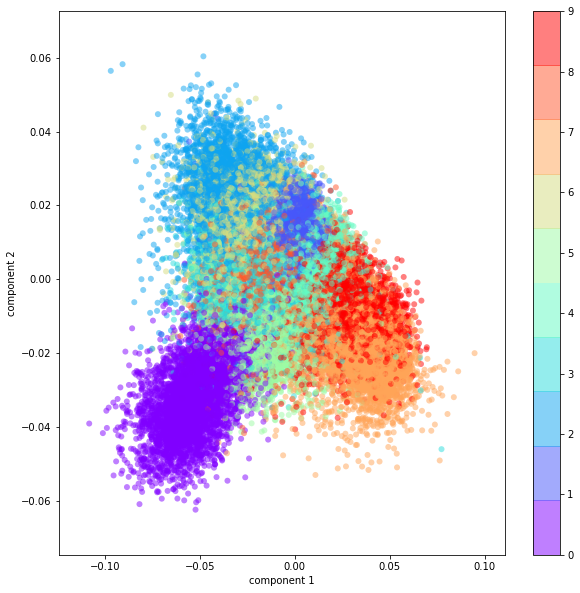

In [78]:
plt.figure(figsize=(10,10))
plt.scatter(projected_data[:, 0], projected_data[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();